In [30]:
# Tecnica de analisis multidimensional
from sklearn.manifold import MDS # Importamos la libreria
import pandas as pd
import matplotlib.pyplot as plt
from gower import gower_matrix

In [31]:
df = pd.read_csv("databases/correspondencia.csv", sep=";", index_col=0)
df.head()

,carr,gene,estr,orig,age
1,Biol,F,alto,Bogo,17
2,Biol,M,medio,Bogo,17
3,Biol,F,bajo,Bogo,18
4,Biol,F,bajo,Bogo,18
5,Biol,M,medio,Bogo,17


In [32]:
columns = ["Carrera", "Genero", "Estrato", "Origen", "Edad"]
df.columns = columns
df.head()

,Carrera,Genero,Estrato,Origen,Edad
1,Biol,F,alto,Bogo,17
2,Biol,M,medio,Bogo,17
3,Biol,F,bajo,Bogo,18
4,Biol,F,bajo,Bogo,18
5,Biol,M,medio,Bogo,17


In [33]:
# Quitar edad
df = df.drop("Edad", axis=1)
df.head()

,Carrera,Genero,Estrato,Origen
1,Biol,F,alto,Bogo
2,Biol,M,medio,Bogo
3,Biol,F,bajo,Bogo
4,Biol,F,bajo,Bogo
5,Biol,M,medio,Bogo


In [34]:
dissimilarity_matrix = gower_matrix(df)
dissimilarity_matrix

array([[0.  , 0.5 , 0.25, ..., 1.  , 1.  , 0.75],
       [0.5 , 0.  , 0.5 , ..., 0.75, 0.75, 1.  ],
       [0.25, 0.5 , 0.  , ..., 0.75, 0.75, 0.5 ],
       ...,
       [1.  , 0.75, 0.75, ..., 0.  , 0.  , 0.25],
       [1.  , 0.75, 0.75, ..., 0.  , 0.  , 0.25],
       [0.75, 1.  , 0.5 , ..., 0.25, 0.25, 0.  ]], dtype=float32)

In [35]:
# Aplicar MDS No Métrico
mds = MDS(n_components=2, dissimilarity='precomputed', metric=False, random_state=0)
df_mds = mds.fit_transform(dissimilarity_matrix)

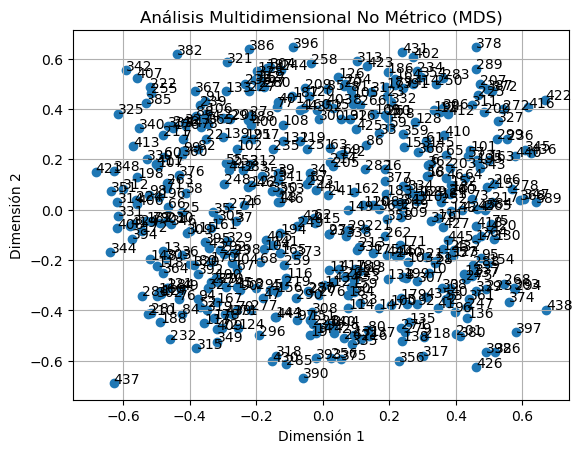

In [36]:
# Graficar los resultados de MDS No Métrico
plt.scatter(df_mds[:, 0], df_mds[:, 1])

for i, txt in enumerate(df.index):
    plt.annotate(txt, (df_mds[i, 0], df_mds[i, 1]))

plt.title('Análisis Multidimensional No Métrico (MDS)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()